# Capítulo 4 - Ejercicios

In [62]:
import os
os.getcwd()
os.listdir()

['.config',
 'kepler.py',
 'moduloaux_py.py',
 'moduloaux.py',
 'Mdrive',
 'modulopl_py.py',
 '__pycache__',
 'sample_data']

In [63]:
from google.colab import drive 
drive.mount('/content/Mdrive')

Drive already mounted at /content/Mdrive; to attempt to forcibly remount, call drive.mount("/content/Mdrive", force_remount=True).


In [64]:
! cp /content/Mdrive/MyDrive/mgual/Geoinfo/Modules/taller03/moduloaux.py .


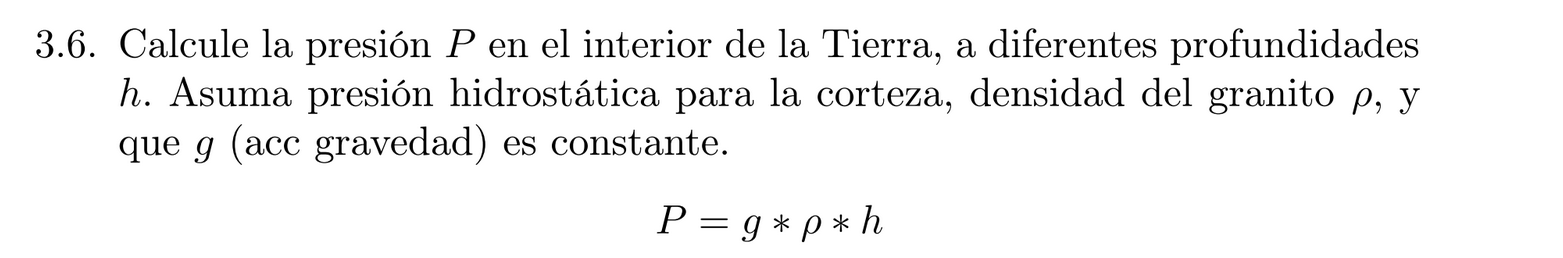

### Ejercicio 1

Modifique el programa del problema 3.6 para calcular la presión litosférica 
con una función propia dentro del programa.



In [65]:
# presión litosférica                      m    *   Kg   *  m  =  Kg    (Pa)
# con función interna                     s^2       m^3     1    s^2*m
h= None
g=float(9.8) #m/s^2
p=float(2691) #Kg/m^3

fmt='%3.3f'
#------------------------------------
while h!=0.0 and h!=-0.0:
  h=float(input('Ingrese la profundidad (en Km negativos) a la cual desea evaluar la presión litostática de la Tierra, 0 para finalizar: '))
  def presion_litostatica_fun(g,p,h):
    #Hacer presión litostática + presión hidrostática
      P = (-1*g*p*(h*1000)) #N/m^2
      return P
  print('La presión litostátia a una profundidad de',h,'Km es de',fmt%((presion_litostatica_fun(g,p,h))/1000000),'MPa (Mega-Pascales)')
  #------------------------------------
print('Fin del programa')


Ingrese la profundidad (en Km negativos) a la cual desea evaluar la presión litostática de la Tierra, 0 para finalizar: -650
La presión litostátia a una profundidad de -650.0 Km es de 17141.670 MPa (Mega-Pascales)
Ingrese la profundidad (en Km negativos) a la cual desea evaluar la presión litostática de la Tierra, 0 para finalizar: 0
La presión litostátia a una profundidad de 0.0 Km es de -0.000 MPa (Mega-Pascales)
Fin del programa


### Ejercicio 2

Modifique el programa del problema 3.6 para calcular calcular la presión litosférica con una función propia en un módulo propio. Ponga el módulo en el folder donde está trabajando.



In [66]:
# presión litosférica 
from moduloaux import presion_litostatica_mod
h=None
while h!=0.0 and h!=-0.0:
  h=float(input('Ingrese la profundidad (en Km negativos) a la cual desea evaluar la presión litostática de la Tierra, 0 para finalizar: '))
  print('La presión litostátia a una profundidad de',h,'Km es de',fmt%((presion_litostatica_mod(g,p,h))/1000000),'MPa (Mega-Pascales)')
  #-------------------------------------------------------------------- #Acá arriba se está printeando con la "mod",no la "fun"
print('Fin del programa')
# Fin con la función propia que es igual que la superior sólo que se ha grabado en el disco y se trajo




Ingrese la profundidad (en Km negativos) a la cual desea evaluar la presión litostática de la Tierra, 0 para finalizar: -650
La presión litostátia a una profundidad de -650.0 Km es de 17141.670 MPa (Mega-Pascales)
Ingrese la profundidad (en Km negativos) a la cual desea evaluar la presión litostática de la Tierra, 0 para finalizar: 0
La presión litostátia a una profundidad de 0.0 Km es de -0.000 MPa (Mega-Pascales)
Fin del programa


### Ejercicio 3

Cree una función propia (dentro de su **package** propio o dentro del programa) en Python que calcule el volumen y circunferencia de una esfera, si el usuario proporciona el radio. Haga un programa principal que solicite el radio al usuario, y haga que éste sea estable, que no acepte números negativos, y que imprima el resultado. 


In [67]:
import math as math
import numpy as np

In [68]:
radius = None
p_i=float(math.pi)
fmto='%5.2f'
while radius!=0:
  radius=float(input('Ingrese el valor del radio en unidades de medida que desee, 0 para finalizar: '))
  if radius>0:
    def volumen_esfera(p_i,radius):
      vol=(4/3)*(p_i*(radius**3))
      return vol
    def circunf_esfera(p_i,radius):
      cir=(2*p_i*radius)
      return cir
    print('El volúmen de la esfera con radio',radius,'es de',fmto%((volumen_esfera(p_i,radius))),'Unidades cúbicas')
    print('La circunferencia de la esfera con radio',radius,'es de',fmto%((circunf_esfera(p_i,radius))),'unidades')
  elif radius<0:
    print('Valor no compatible con las matemáticas')
print('Fin del programa')

Ingrese el valor del radio en unidades de medida que desee, 0 para finalizar: 6371
El volúmen de la esfera con radio 6371.0 es de 1083206916845.75 Unidades cúbicas
La circunferencia de la esfera con radio 6371.0 es de 40030.17 unidades
Ingrese el valor del radio en unidades de medida que desee, 0 para finalizar: 0
Fin del programa


### Ejercicio 4

Realmente los astronautas experimentan *gravedad cero*? La siguiente ecuación (asumiendo un planeta esféricamente simétrico) muestra la aceleración de la gravedad $g = a_G$ de una masa $m$ debido a la masa de la Tierra $M_E$ en función a la distancia $r$ con respecto al centro del planeta. La aceleración tiene dirección al centro de la Tierra. 
$$
a_G = G \frac{M}{r^2}
$$
Asumiendo la constante gravitacional es $G = 6.67430e-11$ y que la masa de la Tierra $M_E=5.972e24$ kg, usando **funciones propias en lo posible** calcule la aceleración en la superficie de la Tierra a 0, 10, 100, 1000, 10000 km de altura. También defina el porcentaje de aceleración para un astronatura a esas alturas, comparado con una persona en la superficie de la Tierra.  


In [69]:
G = float(6.67430E-11) #N*m^2/Kg^2
Me=float(5.972E24) #Kg
r= None #Km
r_range=np.array([0,10,100,1000,10000])
fmt1='%10.5f'
print('Elevación a evaluar(Km)          aG   ')
for r in r_range:
    def Ag(G,Me,r):
      ag=G*(Me/((6371000+(r*1000))**2))           #N*m^2/Kg^2 * Kg/m^2 #(Paso de km a m)
      return ag
    print(r,'                       ',fmt1%(Ag(G,Me,r)))
print('Fin del programa')

#Notar que si se pone evaluado en 0, o sea, en la superficie, tendería a infinito, por eso se evalúa cercano a él

Elevación a evaluar(Km)          aG   
0                            9.81997
10                            9.78922
100                            9.51881
1000                            7.33623
10000                            1.48722
Fin del programa


In [70]:
#Parte 2:
fmt2='%3.2f'
a=float(9.8) #m/s^2
x=float(100.0)
for r in r_range:
  def porcentaje_a (r,a,x):
    porcentaje=((Ag(G,Me,r))*x)/a
    return porcentaje
  print('El porcentaje de aceleración para la altura:',r,'km es de',fmt2%(porcentaje_a(r,a,x)),'% con respecto a la media en la Tierra, que se toma como',a,'m/s^2')
print('Fin del programa')



El porcentaje de aceleración para la altura: 0 km es de 100.20 % con respecto a la media en la Tierra, que se toma como 9.8 m/s^2
El porcentaje de aceleración para la altura: 10 km es de 99.89 % con respecto a la media en la Tierra, que se toma como 9.8 m/s^2
El porcentaje de aceleración para la altura: 100 km es de 97.13 % con respecto a la media en la Tierra, que se toma como 9.8 m/s^2
El porcentaje de aceleración para la altura: 1000 km es de 74.86 % con respecto a la media en la Tierra, que se toma como 9.8 m/s^2
El porcentaje de aceleración para la altura: 10000 km es de 15.18 % con respecto a la media en la Tierra, que se toma como 9.8 m/s^2
Fin del programa


In [10]:
print('Fin del taller <:°)')

Fin del taller <:°)
